In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Master_df.csv', index_col = 0)

In [3]:
df.drop(['SV'], axis=1, inplace=True)

In [6]:
df.drop(['BA Against'], axis=1, inplace=True)

In [7]:
df

,Season,Name,Team,W,L,G,GS,IP,K/9,BB/9,...,AVG,WHIP,IP/G,Pitch Diversity,Shannon Diversity,Strikeouts,Control,Stamina/Consistency,Velocity,Ground Balls
0,2002,A.J. Burnett,Marlins,12,9,29,29,201.2,8.70,3.88,...,0.202,1.17,6.94,14.500000,0.753311,91.000000,27.750000,96.250000,100.000000,57.500000
1,2003,A.J. Burnett,Marlins,0,2,4,4,23.0,8.22,7.04,...,0.209,1.57,5.75,8.755760,0.772823,90.783410,3.686636,51.843318,97.004608,88.940092
2,2004,A.J. Burnett,Marlins,7,6,19,19,118.0,8.31,2.90,...,0.229,1.18,6.21,9.734513,0.812509,89.823009,63.716814,78.982301,100.000000,80.309735
3,2005,A.J. Burnett,Marlins,12,12,32,32,209.0,8.53,3.40,...,0.234,1.26,6.53,20.614035,0.885130,92.543860,37.280702,86.403509,99.122807,94.736842
4,2006,A.J. Burnett,Blue Jays,10,8,21,21,135.2,7.83,2.59,...,0.260,1.30,6.44,7.203390,0.759964,82.415254,73.305085,87.288136,98.728814,85.381356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2013,Zack Wheeler,Mets,7,5,17,17,100.0,7.56,4.14,...,0.236,1.36,5.88,15.966387,0.876027,64.285714,14.705882,56.722689,92.226891,46.428571
3950,2014,Zack Wheeler,Mets,11,11,32,32,185.1,9.08,3.84,...,0.237,1.33,5.78,50.643777,1.061401,86.695279,18.884120,47.854077,96.566524,91.845494
3951,2017,Zack Wheeler,Mets,3,7,17,17,86.1,8.44,4.17,...,0.283,1.59,5.06,37.313433,1.032493,67.164179,14.925373,27.114428,87.810945,71.890547
3952,2018,Zack Wheeler,Mets,12,7,29,29,182.1,8.84,2.71,...,0.221,1.12,6.28,68.208092,1.200651,67.052023,59.537572,96.242775,95.086705,55.491329


In [18]:
metrics = df.loc[:,'Pitch Diversity':'Ground Balls']
metrics.drop(['Shannon Diversity'], axis=1, inplace=True)
metrics['performance'] = metrics.sum(axis=1)
metrics

,Pitch Diversity,Strikeouts,Control,Stamina/Consistency,Velocity,Ground Balls,performance
0,14.500000,91.000000,27.750000,96.250000,100.000000,57.500000,387.000000
1,8.755760,90.783410,3.686636,51.843318,97.004608,88.940092,341.013825
2,9.734513,89.823009,63.716814,78.982301,100.000000,80.309735,422.566372
3,20.614035,92.543860,37.280702,86.403509,99.122807,94.736842,430.701754
4,7.203390,82.415254,73.305085,87.288136,98.728814,85.381356,434.322034
...,...,...,...,...,...,...,...
3949,15.966387,64.285714,14.705882,56.722689,92.226891,46.428571,290.336134
3950,50.643777,86.695279,18.884120,47.854077,96.566524,91.845494,392.489270
3951,37.313433,67.164179,14.925373,27.114428,87.810945,71.890547,306.218905
3952,68.208092,67.052023,59.537572,96.242775,95.086705,55.491329,441.618497


In [19]:
df['performance'] = metrics['performance']

In [23]:
df[df['performance'] == df['performance'].max()]

,Season,Name,Team,W,L,G,GS,IP,K/9,BB/9,...,WHIP,IP/G,Pitch Diversity,Shannon Diversity,Strikeouts,Control,Stamina/Consistency,Velocity,Ground Balls,performance
851,2002,Curt Schilling,Diamondbacks,23,7,35,35,258.1,10.97,1.15,...,0.96,7.37,96.5,1.218695,99.0,98.5,99.5,95.75,47.5,536.75


([<matplotlib.axis.XTick at 0x1ef76471748>,
 <a list of 12 Text xticklabel objects>)

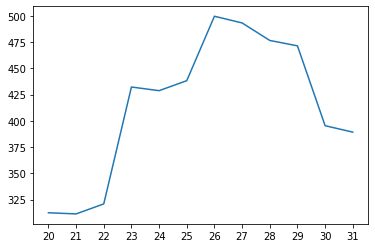

In [43]:
kershaw = df[df['Name'] == 'Clayton Kershaw']
plt.plot(kershaw['Age'], kershaw['performance'])
plt.xticks(np.arange(kershaw['Age'].min(), kershaw['Age'].max()+1,1))

In [44]:
kershaw['delta'] = kershaw['performance'].pct_change()

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
kershaw['delta']

771         NaN
772   -0.003544
773    0.030630
774    0.346733
775   -0.008060
776    0.022187
777    0.139960
778   -0.012770
779   -0.033800
780   -0.010763
781   -0.161261
782   -0.015517
Name: delta, dtype: float64

([<matplotlib.axis.XTick at 0x1ef7686fec8>,
 <a list of 7 Text xticklabel objects>)

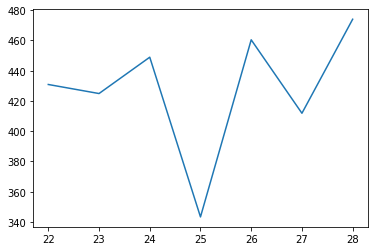

In [81]:
ver = df[df['Name'] == 'Gerrit Cole']
ver.reset_index(drop = True, inplace = True)
plt.plot(ver['Age'], ver['performance'])
plt.xticks(np.arange(ver['Age'].min(), ver['Age'].max()+1,1))

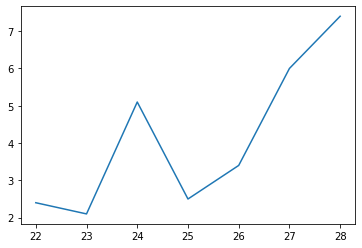

In [87]:
plt.plot(ver['Age'], ver['WAR'])

In [67]:
df[df['Name'] == 'Jacob deGrom']

,Season,Name,Team,W,L,G,GS,IP,K/9,BB/9,...,WHIP,IP/G,Pitch Diversity,Shannon Diversity,Strikeouts,Control,Stamina/Consistency,Velocity,Ground Balls,performance
1512,2014,Jacob deGrom,Mets,9,6,22,22,140.1,9.24,2.76,...,1.14,6.37,54.077253,1.080769,88.841202,52.360515,84.120172,87.768240,58.798283,425.965665
1513,2015,Jacob deGrom,Mets,14,8,30,30,191.0,9.66,1.79,...,0.98,6.37,54.468085,1.076269,91.914894,89.787234,86.808511,93.617021,47.446809,464.042553
1514,2016,Jacob deGrom,Mets,7,8,24,24,148.0,8.70,2.19,...,1.20,6.17,60.869565,1.105460,74.565217,80.217391,87.826087,78.695652,57.608696,439.782609
1515,2017,Jacob deGrom,Mets,15,10,31,31,201.1,10.68,2.64,...,1.19,6.49,62.686567,1.146249,93.532338,71.393035,98.507463,92.786070,60.696517,479.601990
1516,2018,Jacob deGrom,Mets,10,9,32,32,217.0,11.16,1.91,...,0.91,6.78,60.693642,1.176342,94.797688,84.971098,100.000000,96.242775,69.653179,506.358382
1517,2019,Jacob deGrom,Mets,11,8,32,32,204.0,11.25,1.94,...,0.97,6.38,45.569620,1.110375,89.556962,84.810127,98.101266,97.468354,64.873418,480.379747


In [53]:
ver['Ground Balls']

1541    40.697674
1542    60.585586
1543    40.425532
1544    32.142857
1545    74.892704
1546    92.340426
1547    88.043478
1548    58.706468
1549    91.329480
1550    90.822785
Name: Ground Balls, dtype: float64

In [82]:
ver['delta'] = ver['performance'].pct_change()
ver['delta']

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         NaN
1   -0.013901
2    0.056587
3   -0.235390
4    0.341393
5   -0.105545
6    0.151028
Name: delta, dtype: float64

In [86]:
prime = []
for i in range(len(ver)):
    if ver.loc[i, 'performance'] == ver['performance'].max():
        prime.append(ver.loc[i, 'Age'])
        for j in range(1, len(ver) - i):
            if ver.loc[i+j, 'delta'] > -0.1:
                prime.append(ver.loc[i+j, 'Age'])
            elif ver.loc[i+j, 'delta'] <= -0.1:
                break

prime

[28]

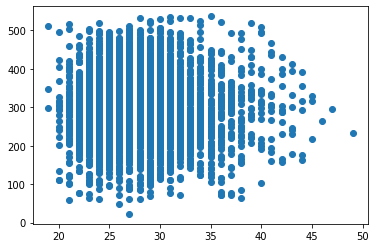

In [20]:
plt.scatter(df['Age'], df['performance'])

In [4]:
df.corr()['Age'].sort_values()

Velocity              -0.384575
FBv                   -0.365200
FB%                   -0.303972
Strikeouts            -0.135317
K/9                   -0.082715
BB/9                  -0.074259
CB%                   -0.036080
LD%                   -0.021991
Ground Balls          -0.010594
LOB%                  -0.007990
GB%                   -0.005308
BA Against            -0.000600
BABIP                  0.000543
WHIP                   0.004807
CH%                    0.007108
FlyBall%               0.016098
ERA                    0.026444
IP/G                   0.038873
WAR                    0.041024
xFIP                   0.041243
SL%                    0.043248
HR/FB                  0.043476
FIP                    0.048631
AVG                    0.058898
HR/9                   0.068428
Season                 0.075860
HBP                    0.078283
Stamina/Consistency    0.082931
W                      0.118083
CT%                    0.123475
L                      0.129320
IP      

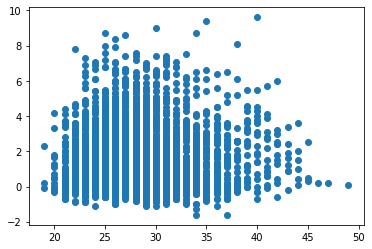

In [6]:
plt.scatter(df['Age'], df['WAR'])

(0, 20)

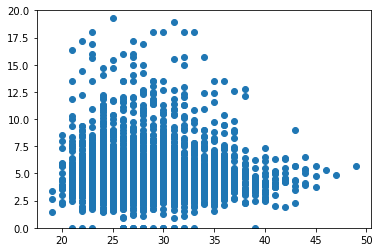

In [34]:
plt.scatter(df['Age'], df['ERA'])
plt.ylim(0, 20)

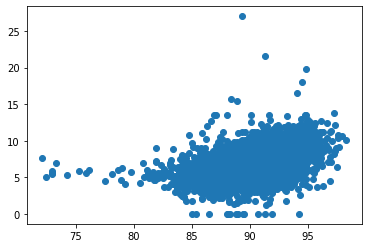

In [7]:
plt.scatter(df['FBv'], df['K/9'])

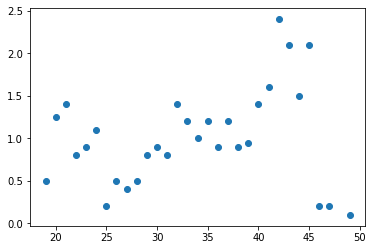

In [9]:
plt.scatter(pd.unique(df['Age']), df.groupby(['Age']).median()['WAR'])

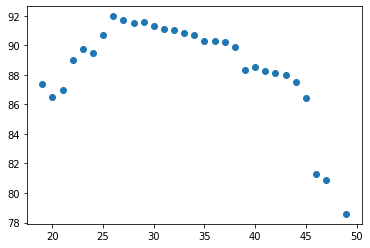

In [10]:
plt.scatter(pd.unique(df['Age']), df.groupby(['Age']).median()['FBv'])

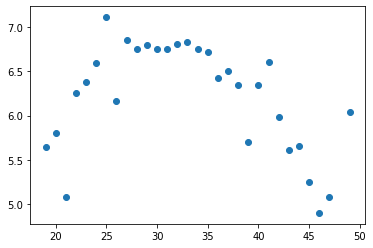

In [11]:
plt.scatter(pd.unique(df['Age']), df.groupby(['Age']).median()['K/9'])

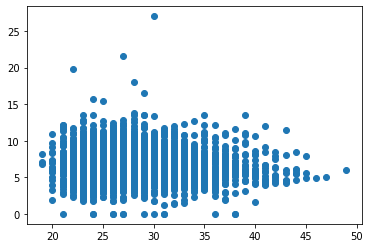

In [12]:
plt.scatter(df['Age'], df['K/9'])

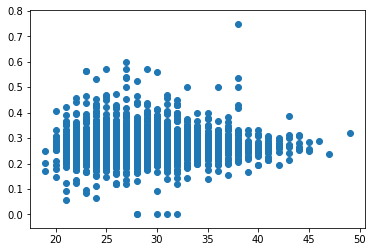

In [13]:
plt.scatter(df['Age'], df['AVG'])

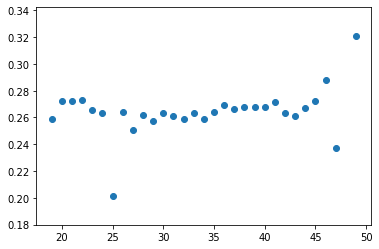

In [14]:
plt.scatter(pd.unique(df['Age']), df.groupby(['Age']).median()['AVG'])

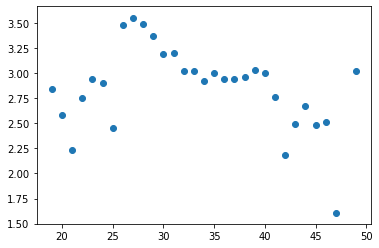

In [15]:
plt.scatter(pd.unique(df['Age']), df.groupby(['Age']).median()['BB/9'])

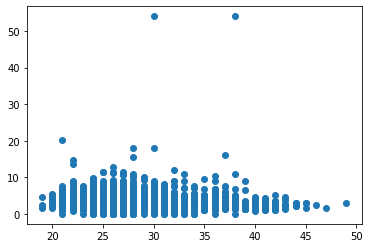

In [16]:
plt.scatter(df['Age'], df['BB/9'])

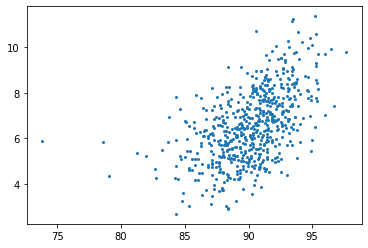

In [17]:
plt.scatter(df.groupby(['Name']).mean()['FBv'], df.groupby(['Name']).mean()['K/9'], s = 4)

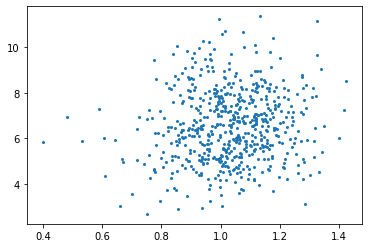

In [18]:
plt.scatter(df.groupby(['Name']).mean()['Shannon Diversity'], df.groupby(['Name']).mean()['K/9'], s = 4)

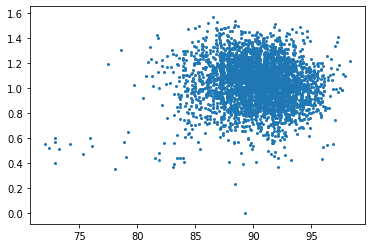

In [76]:
plt.scatter(df['FBv'], df['Shannon Diversity'], s = 4)

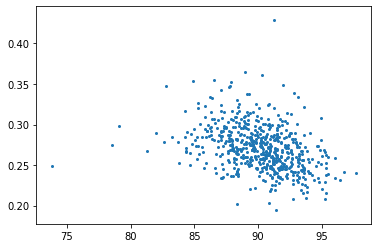

In [19]:
plt.scatter(df.groupby(['Name']).mean()['FBv'], df.groupby(['Name']).mean()['AVG'], s = 4)

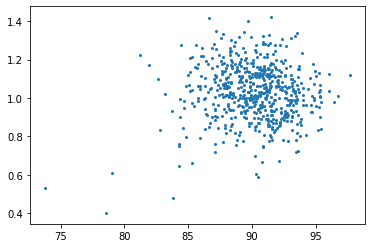

In [20]:
plt.scatter(df.groupby(['Name']).mean()['FBv'], df.groupby(['Name']).mean()['Shannon Diversity'], s = 4)

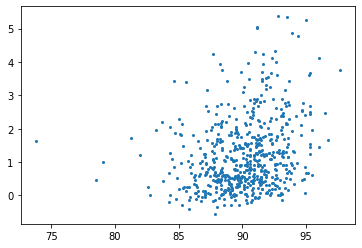

In [21]:
plt.scatter(df.groupby(['Name']).mean()['FBv'], df.groupby(['Name']).mean()['WAR'], s = 4)

In [22]:
(df['Name'].value_counts()[df['Name'].value_counts() > 10]).index

Index(['CC Sabathia', 'Bartolo Colon', 'Edwin Jackson', 'John Lackey',
       'Justin Verlander', 'Kyle Lohse', 'Zack Greinke', 'Ervin Santana',
       'Felix Hernandez', 'Jake Peavy', 'Cole Hamels', 'R.A. Dickey',
       'Aaron Harang', 'Edinson Volquez', 'Jon Lester', 'Anibal Sanchez',
       'A.J. Burnett', 'Mark Buehrle', 'Tim Hudson', 'Jason Vargas',
       'Barry Zito', 'Josh Beckett', 'Chris Young', 'Cliff Lee', 'Dan Haren',
       'Homer Bailey', 'Bronson Arroyo', 'Brandon McCarthy', 'Matt Cain',
       'Francisco Liriano', 'J.A. Happ', 'Jason Hammel', 'James Shields',
       'Clay Buchholz', 'Randy Wolf', 'Jason Marquis', 'Matt Garza',
       'Clayton Kershaw', 'Yovani Gallardo', 'Ubaldo Jimenez',
       'Adam Wainwright', 'Ricky Nolasco', 'Roy Halladay', 'Johnny Cueto',
       'Scott Kazmir', 'Max Scherzer', 'Charlie Morton', 'David Price',
       'Jered Weaver', 'Freddy Garcia', 'Mike Pelfrey', 'Ted Lilly',
       'Jorge De La Rosa', 'Bruce Chen', 'Gio Gonzalez', 'Roy Oswalt

In [23]:
df_10 = pd.DataFrame()

In [24]:
names = (df['Name'].value_counts()[df['Name'].value_counts() > 10]).index.tolist()
names

['CC Sabathia',
 'Bartolo Colon',
 'Edwin Jackson',
 'John Lackey',
 'Justin Verlander',
 'Kyle Lohse',
 'Zack Greinke',
 'Ervin Santana',
 'Felix Hernandez',
 'Jake Peavy',
 'Cole Hamels',
 'R.A. Dickey',
 'Aaron Harang',
 'Edinson Volquez',
 'Jon Lester',
 'Anibal Sanchez',
 'A.J. Burnett',
 'Mark Buehrle',
 'Tim Hudson',
 'Jason Vargas',
 'Barry Zito',
 'Josh Beckett',
 'Chris Young',
 'Cliff Lee',
 'Dan Haren',
 'Homer Bailey',
 'Bronson Arroyo',
 'Brandon McCarthy',
 'Matt Cain',
 'Francisco Liriano',
 'J.A. Happ',
 'Jason Hammel',
 'James Shields',
 'Clay Buchholz',
 'Randy Wolf',
 'Jason Marquis',
 'Matt Garza',
 'Clayton Kershaw',
 'Yovani Gallardo',
 'Ubaldo Jimenez',
 'Adam Wainwright',
 'Ricky Nolasco',
 'Roy Halladay',
 'Johnny Cueto',
 'Scott Kazmir',
 'Max Scherzer',
 'Charlie Morton',
 'David Price',
 'Jered Weaver',
 'Freddy Garcia',
 'Mike Pelfrey',
 'Ted Lilly',
 'Jorge De La Rosa',
 'Bruce Chen',
 'Gio Gonzalez',
 'Roy Oswalt',
 'Phil Hughes',
 'Jordan Zimmermann',
 

(array([  3.,  21., 102., 281., 753., 515., 362., 226., 278., 253., 237.,
        163., 153., 160.,  71., 101.,  70.,  59.,  28.,  27.,  28.,  20.,
         14.,  11.,   7.,   4.,   1.,   3.,   1.,   2.]),
 array([-1.6       , -1.22666667, -0.85333333, -0.48      , -0.10666667,
         0.26666667,  0.64      ,  1.01333333,  1.38666667,  1.76      ,
         2.13333333,  2.50666667,  2.88      ,  3.25333333,  3.62666667,
         4.        ,  4.37333333,  4.74666667,  5.12      ,  5.49333333,
         5.86666667,  6.24      ,  6.61333333,  6.98666667,  7.36      ,
         7.73333333,  8.10666667,  8.48      ,  8.85333333,  9.22666667,
         9.6       ]),
 <a list of 30 Patch objects>)

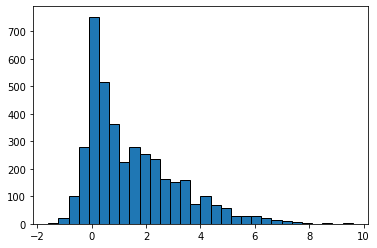

In [25]:
plt.hist(df['WAR'], edgecolor = 'black', bins = 30)

(array([ 14.,   9.,  33., 100., 292., 552., 705., 683., 653., 407., 272.,
        107.,  78.,  26.,   8.,   8.,   0.,   2.,   1.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. , 18.9,
        19.8, 20.7, 21.6, 22.5, 23.4, 24.3, 25.2, 26.1, 27. ]),
 <a list of 30 Patch objects>)

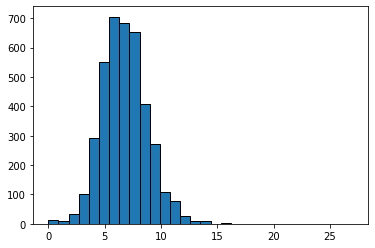

In [26]:
plt.hist(df['K/9'], edgecolor = 'black', bins = 30)

(0, 15)

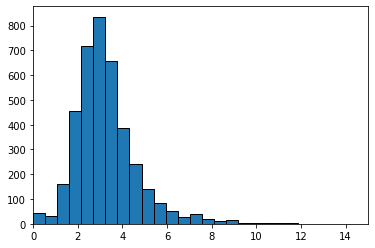

In [27]:
plt.hist(df['BB/9'], edgecolor = 'black', bins = 100)
plt.xlim(0, 15)